In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
#income per state
income_data = pd.read_csv("resources/income.csv")
income_data.head()

,State,"Total, all households",Mean income
0,Alabama,1821210,57655
1,Alaska,248248,82091
2,Arizona,2326468,67436
3,Arkansas,1117154,53253
4,California,12392852,83483


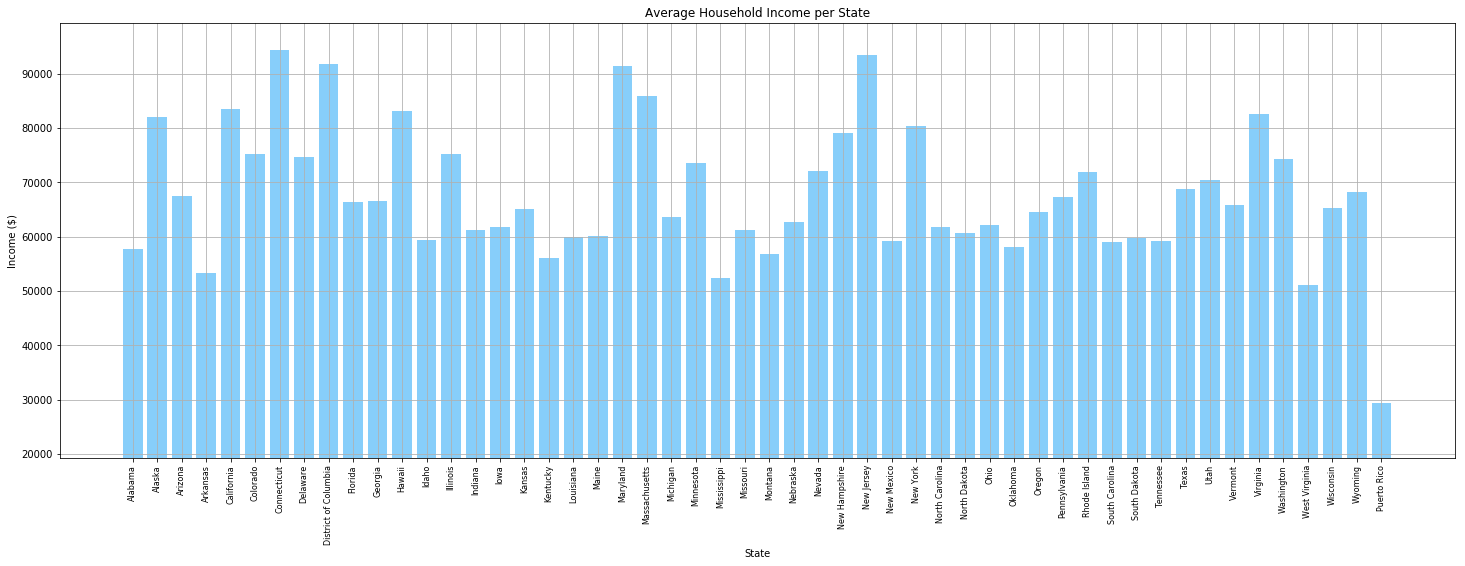

In [9]:
plt.bar(income_data["State"], income_data["Mean income"], color="lightskyblue")
plt.title("Average Household Income per State")
tick_locations = [value for value in income_data["State"]]
plt.xticks(tick_locations, fontsize=8, rotation=90)
plt.ylim(min(income_data["Mean income"])-10000, max(income_data["Mean income"]+5000))
plt.xlabel("State")
plt.ylabel("Income ($)")
plt.grid()

#current fig size is 6.0 x 4.0
fig_size = plt.rcParams["figure.figsize"]
fig_size

fig_size[0] = 20
fig_size[1] = 10

plt.savefig("Income.png", edgecolor="black", frameon=True)

In [4]:
demo_data = pd.read_csv("resources/sexagerace2013-2017.csv")
demo_data["Total population"] = pd.to_numeric(demo_data["Total population"])
demo_data.head()

,State,Total population,Male Percent,Female Percent,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,...,21 years and over,62 years and over,65 years and over,White,Black,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Other Race,Total population - Hispanic or Latino (of any race)
0,Alabama,4850771,48.5,51.5,6.0,6.3,6.5,6.7,7.0,12.9,...,73.1,19.4,15.7,68.4,26.5,0.5,1.3,0.0,1.4,4.1
1,Alaska,738565,52.3,47.7,7.3,7.0,6.8,6.5,7.9,16.0,...,70.8,13.3,10.1,65.3,3.2,14.2,6.2,1.2,1.4,6.8
2,Arizona,6809946,49.7,50.3,6.4,6.7,6.7,6.8,7.1,13.5,...,71.9,19.7,16.2,77.5,4.3,4.4,3.1,0.2,7.0,30.9
3,Arkansas,2977944,49.1,50.9,6.4,6.7,6.6,6.7,6.9,13.0,...,72.1,19.5,16.0,77.3,15.4,0.7,1.4,0.2,2.5,7.2
4,California,38982847,49.7,50.3,6.4,6.5,6.5,6.7,7.3,14.9,...,72.4,16.4,13.2,60.6,5.8,0.7,14.1,0.4,13.7,38.8


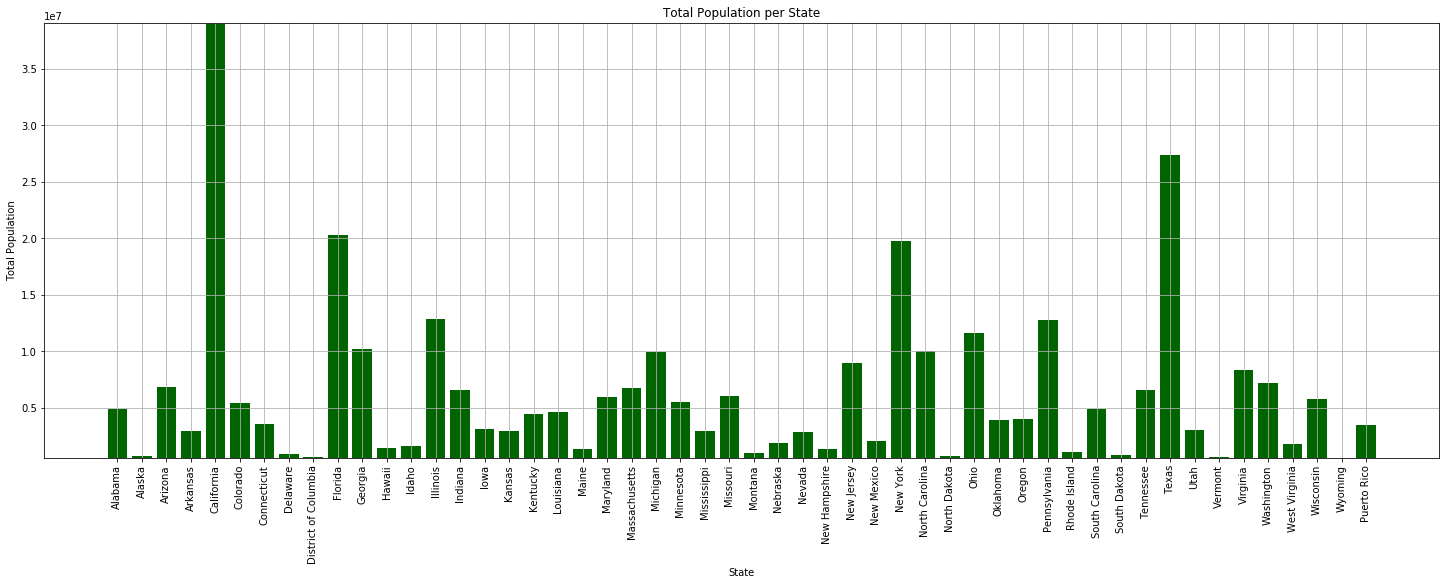

In [14]:
#population per state
#why is y axis not registering limits????
plt.bar(demo_data["State"], demo_data["Total population"], color="darkgreen")
plt.ylim(min(demo_data["Total population"]-10000), max(demo_data["Total population"])+100000)
plt.xticks(rotation=90)
plt.grid()
plt.title("Total Population per State")
plt.xlabel("State")
plt.ylabel("Total Population")

plt.savefig("Population.png")
#bbox_inches="tight" can be added to savefig

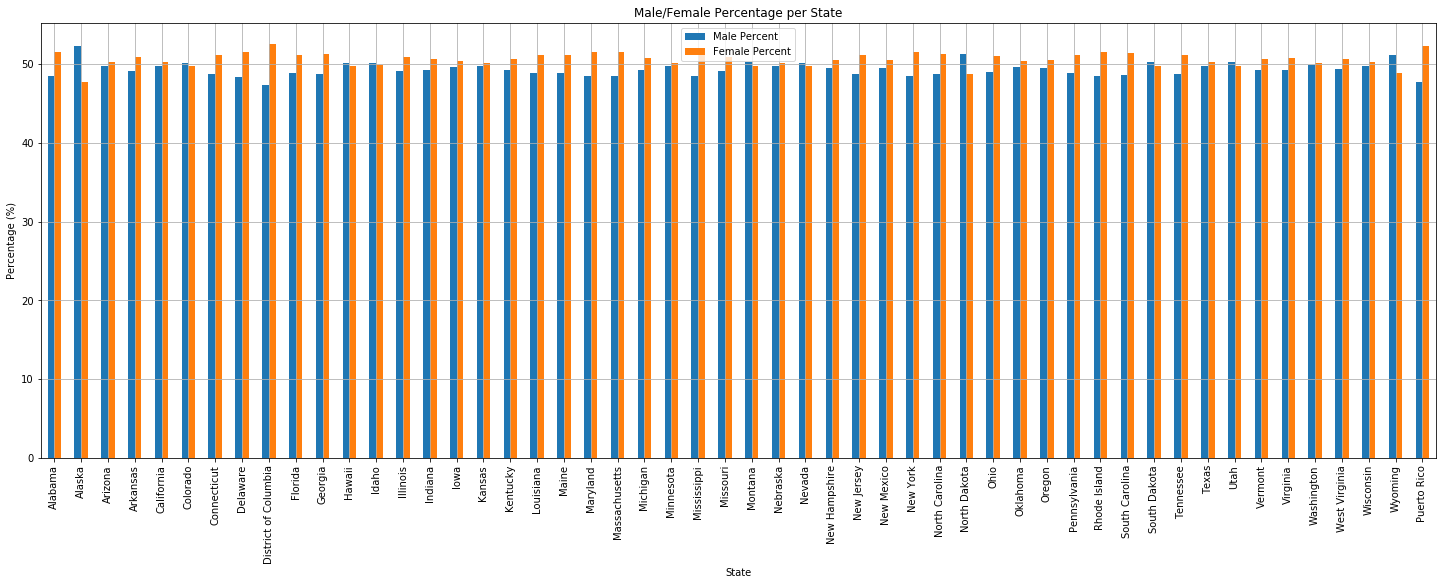

In [15]:
#male/female info
#demo_data[["Male Percent", "Female Percent"]].plot(kind='bar')
demo_data.plot.bar(x = "State", y = ["Male Percent", "Female Percent"], rot = 90)
plt.title("Male/Female Percentage per State")
plt.ylabel("Percentage (%)")
plt.grid()

plt.savefig("MaleFemale.png")

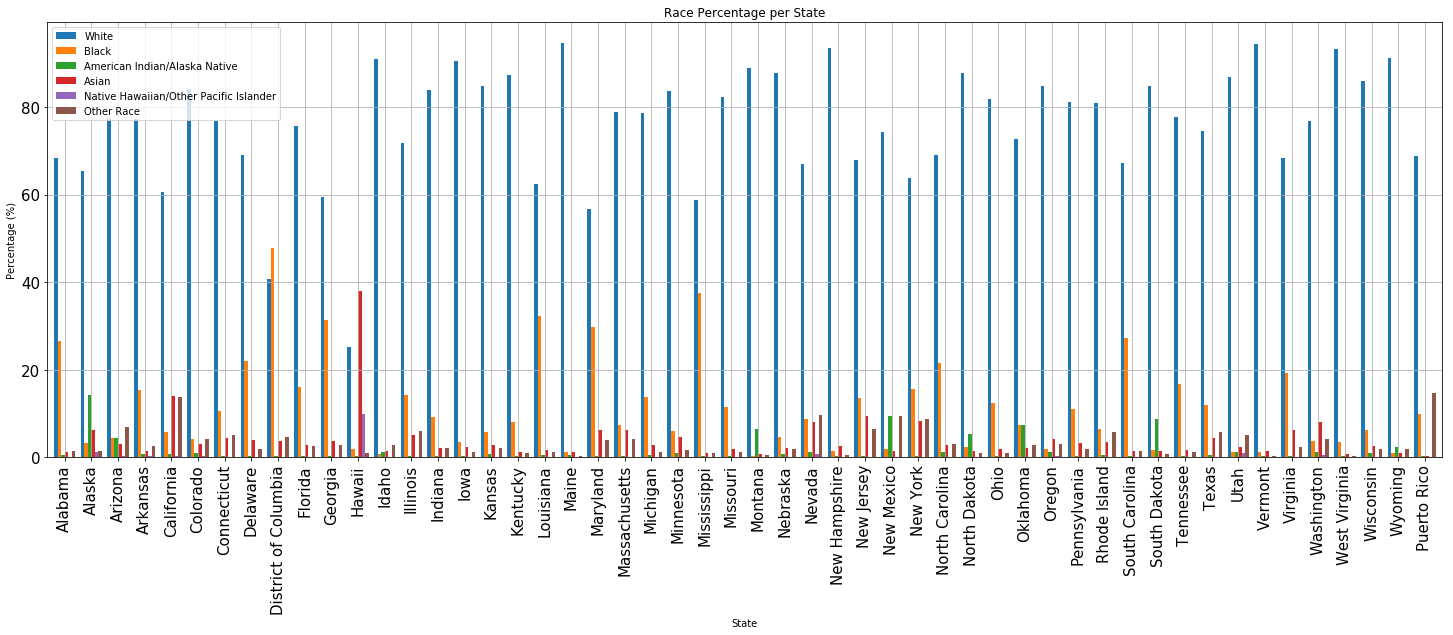

In [16]:
#race per state
demo_data.plot.bar(x = "State", y = ["White", "Black", "American Indian/Alaska Native", "Asian", "Native Hawaiian/Other Pacific Islander", "Other Race"], 
                   rot = 90,
                  width=.8,
                  fontsize=15)
plt.title("Race Percentage per State")
plt.ylabel("Percentage (%)")

fig_size = plt.rcParams["figure.figsize"]
fig_size

fig_size[0] = 30
fig_size[1] = 10

plt.grid()
#plt.tight_layout()

plt.savefig("Race.png")

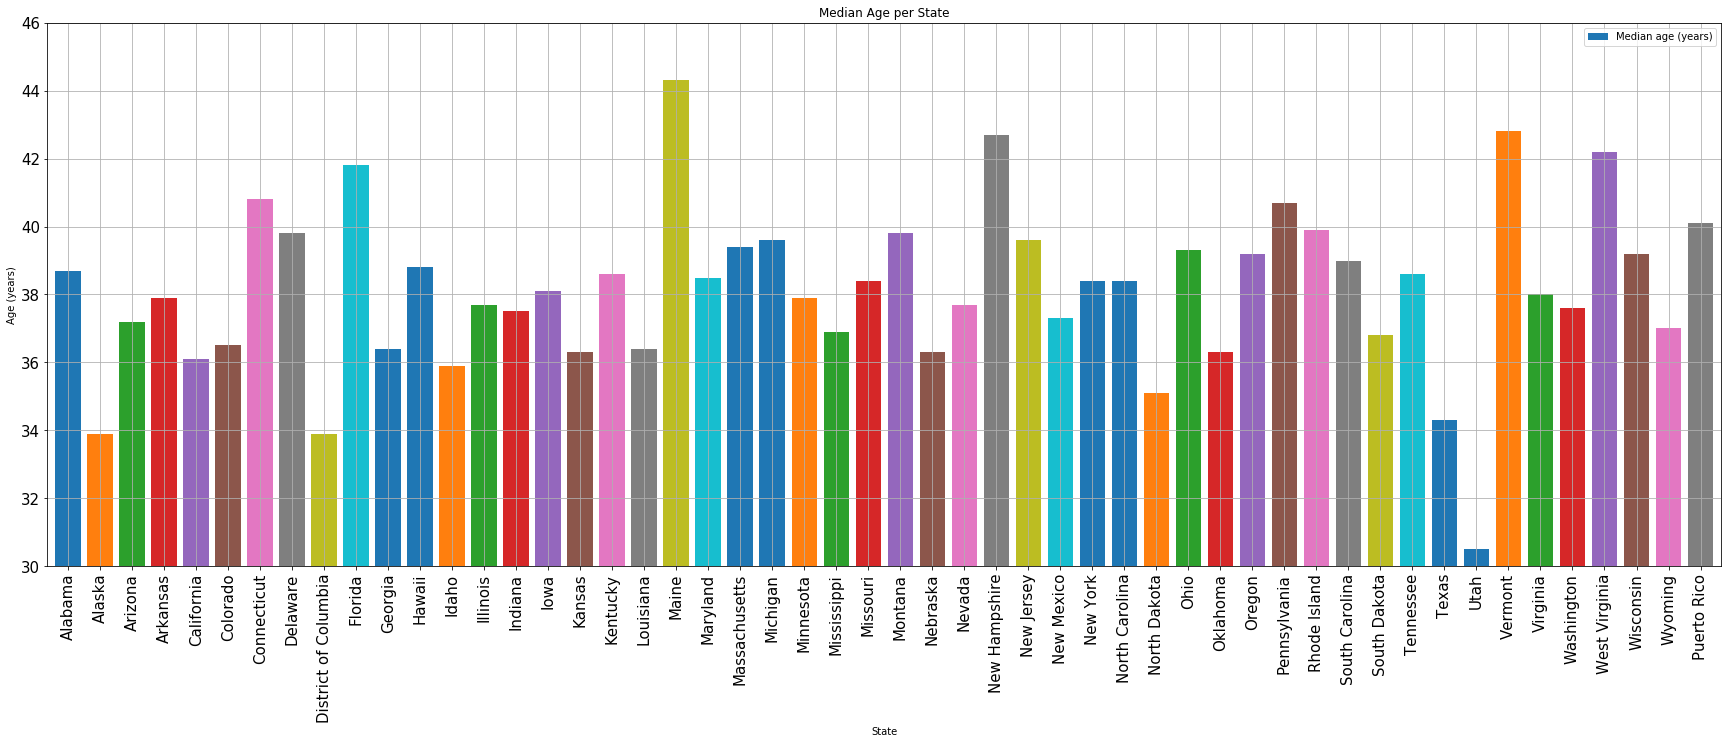

In [17]:
#median age per state
demo_data.plot.bar(x = "State", y = "Median age (years)", 
                    rot = 90,
                    width=.8,
                    fontsize=15)
plt.title("Median Age per State")
plt.ylabel("Age (years)")
plt.ylim(30, 46)

fig_size = plt.rcParams["figure.figsize"]
fig_size

fig_size[0] = 25
fig_size[1] = 8

plt.grid()
#plt.tight_layout()
plt.savefig("Age.png")